Question 1: Occupations

In [1]:
# 1. Import necessary libraries:
    
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
# 2. Importing dataset from the github link:
# 3. Assigning dataset to a variable called 'users':

link = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(link, delimiter = '|')
users.head(10)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [3]:
# 4. Mean age per occupation:

meanAge = users.groupby(['occupation']).agg({'age':'mean'})
print("---- Average age occupation-wise ----")
print(meanAge)

---- Average age occupation-wise ----
                     age
occupation              
administrator  38.746835
artist         31.392857
doctor         43.571429
educator       42.010526
engineer       36.388060
entertainment  29.222222
executive      38.718750
healthcare     41.562500
homemaker      32.571429
lawyer         36.750000
librarian      40.000000
marketing      37.615385
none           26.555556
other          34.523810
programmer     33.121212
retired        63.071429
salesman       35.666667
scientist      35.548387
student        22.081633
technician     33.148148
writer         36.311111


In [121]:
# 5. Finding male ratio per occupation and sort from most to least:

df = users[['gender','occupation']]
male = df.loc[df['gender'] == 'M']
total = df.groupby('occupation').count()
male = male.groupby('occupation').count()
maleRatio = male / total
maleRatio.sort_values(by = 'gender', ascending = False)

,gender
occupation,
doctor,1.000000
engineer,0.970149
technician,0.962963
retired,0.928571
programmer,0.909091
executive,0.906250
scientist,0.903226
entertainment,0.888889
lawyer,0.833333


In [120]:
# 6. Finding minimum and maximum ages for each occupation:

minAge = users.groupby(['occupation']).agg({'age':'min'})
maxAge = users.groupby(['occupation']).agg({'age':'max'})
print("---- Minimum age - occupation-wise ----")
print(minAge)
print(' ')
print("---- Maximum age - occupation wise ----")
print(maxAge)

---- Minimum age - occupation-wise ----
               age
occupation        
administrator   21
artist          19
doctor          28
educator        23
engineer        22
entertainment   15
executive       22
healthcare      22
homemaker       20
lawyer          21
librarian       23
marketing       24
none            11
other           13
programmer      20
retired         51
salesman        18
scientist       23
student          7
technician      21
writer          18
 
---- Maximum age - occupation wise ----
               age
occupation        
administrator   70
artist          48
doctor          64
educator        63
engineer        70
entertainment   50
executive       69
healthcare      62
homemaker       50
lawyer          53
librarian       69
marketing       55
none            55
other           64
programmer      63
retired         73
salesman        66
scientist       55
student         42
technician      55
writer          60


In [6]:
# 7. Finding mean age for each combination of occupation and sex:

meanAge = users.groupby(['occupation','gender']).agg({'age':'mean'})
print("---- Mean age by occupation and gender ----")
print(meanAge)

---- Mean age by occupation and gender ----
                            age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166

In [123]:
# 8. Percentage of men and women for each occupation:

percentM_F = (users.groupby(['occupation', 'gender'])['gender'].count().groupby(level = 0).transform(lambda x: x/x.sum()*100))
print("---- Percentage of men and women in each occupation ----")
print(percentM_F)

---- Percentage of men and women in each occupation ----
occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F     

Question 2: Euro Teams

In [8]:
# 1. Importing necessary libraries:

import pandas as pd
import numpy as np

In [9]:
# 2. Import dataset from github link provided
# 3. Assigning dataset to variable called euro12 and showing top 10 rows

githubLink = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(githubLink, delimiter = ',')
euro12.head(10)

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [10]:
# 4. Only selecting 'Goals' column

goalsC = euro12['Goals']
goalsC.head(5)

0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

In [11]:
# 5. Finding the number of teams that participated in Euro2012

teamSum = len(euro12['Team'].unique())
print("Total number of teams that participated in Euro 2012 are",teamSum)

Total number of teams that participated in Euro 2012 are 16


In [12]:
# 6. Finding total number of columns in dataset

euro12.shape
print(" Total number of columns in the dataset are", euro12.shape[1])

 Total number of columns in the dataset are 35


In [13]:
# 7. Only select Team, Yellow Cards and Red Cards columns and, assign them to dataframe called discipline

discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline.head(10)

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [14]:
# 8. Sort teams by red card to yellow cards

discipline.sort_values(by = ['Yellow Cards', 'Red Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
6,Greece,9,1
0,Croatia,9,0
9,Poland,7,1
1,Czech Republic,7,0
14,Sweden,7,0
11,Republic of Ireland,6,1
4,France,6,0


In [15]:
# 9. Mean number of yellow cards given per team

yellowCard_M = euro12.groupby(['Team']).agg({'Yellow Cards':'mean'})
print("--- The average yellow cards received per team are ---")
print(yellowCard_M)

--- The average yellow cards received per team are ---
                     Yellow Cards
Team                             
Croatia                       9.0
Czech Republic                7.0
Denmark                       4.0
England                       5.0
France                        6.0
Germany                       4.0
Greece                        9.0
Italy                        16.0
Netherlands                   5.0
Poland                        7.0
Portugal                     12.0
Republic of Ireland           6.0
Russia                        6.0
Spain                        11.0
Sweden                        7.0
Ukraine                       5.0


In [16]:
# 10. Filtering teams scoring more than 6 goals

teamGoal6 = euro12[euro12['Goals'] > 6]
teamGoal6

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [17]:
# 11. Displaying team names starting with letter 'G'

Team_G = euro12[euro12["Team"].str.startswith("G")]
Team_G

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [68]:
# 12. Selecting first 7 columns only

teams7= euro12.iloc[:, :7]
teams7

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [19]:
# 13. Selecting all columns except last 3

teamsNoLast3 = euro12.iloc[:, :-3]
teamsNoLast3

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


Question 3: Housing

In [112]:
# 1. Importing necessary libraries

import pandas as pd
import numpy as np

In [113]:
# 2. Create 3 differents Series, each of length 100, as follows:
    # • The first a random number from 1 to 4
    # • The second a random number from 1 to 3
    # • The third a random number from 10,000 to 30,000

series1 = pd.Series(np.random.randint(1,5,100))
series2 = pd.Series(np.random.randint(1,4,100))
series3 = pd.Series(np.random.randint(10000,30000,100))

In [114]:
# 3. Creating a DataFrame by joining the Series by column

joinedSeries = {"Series1": series1,"Series2": series2,"Series3": series3}
joinedDF = pd.concat(joinedSeries, axis = 1)
joinedDF.head(10)

,Series1,Series2,Series3
0,3,2,27428
1,4,1,27053
2,4,1,17243
3,2,1,14238
4,1,3,11779
5,1,3,28652
6,1,2,17537
7,4,3,22570
8,3,1,12423
9,4,3,11832


In [115]:
# 4. Changing the name of the columns to bedrs, bathrs, price_sqr_meter respectively

joinedDF.rename(columns = {'Series1' : 'bedrs', 'Series2' : 'bathrs', 'Series3' : 'price_sqr_meter'}, inplace = True)
joinedDF.head(10)

,bedrs,bathrs,price_sqr_meter
0,3,2,27428
1,4,1,27053
2,4,1,17243
3,2,1,14238
4,1,3,11779
5,1,3,28652
6,1,2,17537
7,4,3,22570
8,3,1,12423
9,4,3,11832


In [116]:
# 5. Creating a column DataFrame with the values of the 3 Series and assigning it to 'bigcolumn'

bigcolumn = pd.DataFrame(joinedDF['bedrs'].astype(str) + joinedDF['bathrs'].astype(str) + joinedDF['price_sqr_meter'].astype(str))
bigcolumn

,0
0,3227428
1,4127053
2,4117243
3,2114238
4,1311779
...,...
95,4218633
96,2110852
97,2227645
98,4210084


In [117]:
# 6. Ops it seems it is going only until index 99. Is it true?
# Answer: Yes, it is true that the index is only going until 99 because the row indexing starts from 0 not 1.

In [118]:
# 7. Reindexing the DataFrame so it goes from 0 to 299

bigcolumn.reindex(range(0, 300))

,0
0,3227428
1,4127053
2,4117243
3,2114238
4,1311779
...,...
295,NaN
296,NaN
297,NaN
298,NaN


Question 4: Wind statistics

In [91]:
# 1. Importing the necessary libraries

import pandas as pd
from datetime import date
import datetime as dt 

In [92]:
# 2. Import the dataset from the attached file wind.txt
# 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

data = pd.read_fwf('wind.txt', parse_dates = [['Yr','Mo','Dy']])
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [93]:
# 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

data["Yr_Mo_Dy"] = data["Yr_Mo_Dy"].apply(lambda x: dt.date(x.year-100, x.month, x.day) 
if x.year > 1990 else dt.date(x.year, x.month, x.day))
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [94]:
# 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])
display(data.dtypes)
data = data.set_index('Yr_Mo_Dy')
data.index
data

Yr_Mo_Dy    datetime64[ns]
RPT                float64
VAL                float64
ROS                float64
KIL                float64
SHA                float64
BIR                float64
DUB                float64
CLA                float64
MUL                float64
CLO                float64
BEL                float64
MAL                float64
dtype: object

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


In [31]:
# 6. Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below.

data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [32]:
# 7. Compute how many non-missing values there are in total.

data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [33]:
# 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times. 
# A single number for the entire dataset.

data.mean().mean()

10.227982360836924

In [34]:
# 9. Create a DataFrame called loc_stats and calculate the min, max, mean and standard deviations of the windspeeds at each location over all the days. 
# A different set of numbers for each location.

loc_stats = pd.concat([data.min(), data.max(), data.mean(), data.std()], axis = 1) 
loc_stats.rename(columns = { 0:'Min', 1:'Max', 2:'Mean', 3:'Std'}, inplace = True)
print(loc_stats)

      Min    Max       Mean       Std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


In [35]:
# 10. Create a DataFrame called day_stats and calculate the min, max, mean and standard deviations of the windspeeds across all the locations at each day. 
# A different set of numbers for each day.

day_stats = pd.concat([data.min(axis = 1), data.max(axis = 1), data.mean(axis = 1), data.std(axis = 1)], axis = 1)
day_stats.rename(columns={0:'Min', 1:'Max', 2:'Mean', 3:'Std'}, inplace = True)
print(day_stats)

             Min    Max       Mean       Std
Yr_Mo_Dy                                    
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


In [36]:
# 11. Find the average windspeed in January for each location. 
# Treat January 1961 and January 1962 both as January.

data[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [37]:
#Step 12. Downsample the record to a yearly frequency for each location.

yearly_resample = data.resample('Y').ffill()
yearly_resample

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-12-31,9.87,7.83,7.67,3.75,5.66,3.50,10.04,3.08,5.04,3.79,8.04,14.67
1962-12-31,22.67,16.88,28.67,14.12,19.75,17.08,27.79,25.21,19.83,17.79,25.46,37.63
1963-12-31,13.88,14.42,12.12,9.25,14.33,10.67,18.29,11.96,12.04,15.37,16.79,14.09
1964-12-31,16.33,19.25,13.37,10.08,17.04,12.54,19.83,13.79,12.67,15.04,21.37,23.58
1965-12-31,13.62,13.88,12.29,6.08,12.33,7.41,9.59,10.21,7.46,12.17,15.71,16.75
1966-12-31,13.00,11.46,10.13,6.34,11.87,7.50,13.50,8.46,11.00,10.04,17.29,22.46
1967-12-31,16.88,13.75,11.34,9.08,13.54,7.71,11.75,11.83,11.83,11.75,17.25,22.63
1968-12-31,9.13,2.13,7.38,2.50,4.04,0.50,6.83,2.54,3.54,5.50,5.71,12.42
1969-12-31,14.42,13.83,27.71,7.08,12.08,10.00,14.58,11.00,12.54,7.12,11.17,17.41


In [38]:
# 13. Downsample the record to a monthly frequency for each location.

monthly_resample = data.resample('M').ffill()
monthly_resample

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-31,24.21,19.55,16.71,11.96,14.42,10.46,14.88,8.21,10.50,9.96,12.42,13.92
1961-02-28,12.92,12.75,NaN,8.92,16.13,12.29,14.75,14.46,13.96,14.04,18.41,13.17
1961-03-31,8.96,8.04,9.13,8.50,10.75,9.54,11.92,9.59,11.25,8.54,11.96,12.21
1961-04-30,11.67,11.00,9.54,5.54,9.42,5.79,5.09,8.25,6.96,6.25,12.21,8.75
1961-05-31,7.00,9.79,12.25,4.83,8.25,5.37,6.58,9.29,6.58,7.12,11.87,10.63
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-31,11.54,5.54,7.41,4.67,7.62,6.17,8.87,5.25,7.83,6.17,11.58,16.88
1978-09-30,26.75,15.63,16.54,13.37,17.58,13.13,16.92,13.79,13.46,13.79,18.91,31.88
1978-10-31,8.58,4.29,10.79,4.29,4.08,2.71,4.63,1.04,3.67,2.75,8.71,10.67


In [39]:
# 14. Downsample the record to a weekly frequency for each location.

weekly_resample = data.resample('W').ffill()
weekly_resample

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-08,10.96,9.75,7.62,5.91,9.62,7.29,14.29,7.62,9.25,10.46,16.62,16.46
1961-01-15,12.04,9.67,11.75,2.37,7.38,3.13,2.50,6.83,4.75,5.63,7.54,6.75
1961-01-22,9.59,5.88,9.92,2.17,6.87,5.50,9.38,7.04,6.34,7.50,10.88,9.92
1961-01-29,NaN,23.91,22.29,17.54,24.08,19.70,22.00,20.25,21.46,19.95,27.71,23.38
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-03,21.21,21.34,17.75,11.58,16.75,14.46,17.46,15.29,15.79,17.50,21.42,25.75
1978-12-10,24.92,22.54,16.54,14.62,15.59,13.00,13.21,14.12,16.21,16.17,26.08,21.92
1978-12-17,9.87,3.21,8.04,2.21,3.04,0.54,2.46,1.46,1.29,2.67,5.00,9.08


In [40]:
# 15. Calculate the min, max, mean and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

wkly_stat = weekly_resample.groupby(weekly_resample.index.to_period('W')).agg(['min','max','mean','std'])
wkly_stat.loc[wkly_stat.index[1:53], :]

RPT                      VAL                    \
                         min    max   mean std    min    max   mean std   
Yr_Mo_Dy                                                                  
1961-01-02/1961-01-08  10.96  10.96  10.96 NaN   9.75   9.75   9.75 NaN   
1961-01-09/1961-01-15  12.04  12.04  12.04 NaN   9.67   9.67   9.67 NaN   
1961-01-16/1961-01-22   9.59   9.59   9.59 NaN   5.88   5.88   5.88 NaN   
1961-01-23/1961-01-29    NaN    NaN    NaN NaN  23.91  23.91  23.91 NaN   
1961-01-30/1961-02-05  22.00  22.00  22.00 NaN  16.75  16.75  16.75 NaN   
1961-02-06/1961-02-12  16.00  16.00  16.00 NaN  16.92  16.92  16.92 NaN   
1961-02-13/1961-02-19  16.17  16.17  16.17 NaN  15.59  15.59  15.59 NaN   
1961-02-20/1961-02-26  25.80  25.80  25.80 NaN  21.50  21.50  21.50 NaN   
1961-02-27/1961-03-05  11.25  11.25  11.25 NaN  17.00  17.00  17.00 NaN   
1961-03-06/1961-03-12    NaN    NaN    NaN NaN  13.88  13.88  13.88 NaN   
1961-03-13/1961-03-19  11.42  11.42  11.42 NaN   9.46   9.46   9.46 NaN   
1961-03-20/1961-03-26  15.00  15.00  15.00 NaN  11.63  11.63  11.63 NaN   
1961-03-27/1961-04-02   7.62   7.62   7.62 NaN   4.25   4.25   4.25 NaN   
1961-04-03/1961-04-09  13.37  13.37  13.37 NaN  11.12  11.12  11.12 NaN   
1961-04-10/1961-04-16   4.71   4.71   4.71 NaN   7.00   7.00   7.00 NaN   
1961-04-17/1961-04-23  12.21  12.21  12.21 NaN   7.87   7.87   7.87 NaN   
1961-04-24/1961-04-30  11.67  11.67  11.67 NaN  11.00  11.00  11.00 NaN   
1961-05-01/1961-05-07  18.16  18.16  18.16 NaN  17.71  17.71  17.71 NaN   
1961-05-08/1961-05-14   9.25   9.25   9.25 NaN   6.54   6.54   6.54 NaN   
1961-05-15/1961-05-21   6.83   6.83   6.83 NaN   4.29   4.29   4.29 NaN   
1961-05-22/1961-05-28   9.96   9.96   9.96 NaN   7.67   7.67   7.67 NaN   
1961-05-29/1961-06-04   8.50   8.50   8.50 NaN   6.42   6.42   6.42 NaN   
1961-06-05/1961-06-11   8.29   8.29   8.29 NaN   6.83   6.83   6.83 NaN   
1961-06-12/1961-06-18  12.12  12.12  12.12 NaN   9.29   9.29   9.29 NaN   
1961-06-19/1961-06-25   9.00   9.00   9.00 NaN   8.25   8.25   8.25 NaN   
1961-06-26/1961-07-02  12.04  12.04  12.04 NaN   7.25   7.25   7.25 NaN   
1961-07-03/1961-07-09   7.29   7.29   7.29 NaN   5.71   5.71   5.71 NaN   
1961-07-10/1961-07-16  21.42  21.42  21.42 NaN  10.88  10.88  10.88 NaN   
1961-07-17/1961-07-23   3.04   3.04   3.04 NaN   3.71   3.71   3.71 NaN   
1961-07-24/1961-07-30   6.13   6.13   6.13 NaN  10.41  10.41  10.41 NaN   
1961-07-31/1961-08-06   8.38   8.38   8.38 NaN   6.71   6.71   6.71 NaN   
1961-08-07/1961-08-13  12.96  12.96  12.96 NaN   9.13   9.13   9.13 NaN   
1961-08-14/1961-08-20  13.75  13.75  13.75 NaN  13.62  13.62  13.62 NaN   
1961-08-21/1961-08-27  11.25  11.25  11.25 NaN  13.59  13.59  13.59 NaN   
1961-08-28/1961-09-03  11.63  11.63  11.63 NaN   7.29   7.29   7.29 NaN   
1961-09-04/1961-09-10   5.00   5.00   5.00 NaN   8.79   8.79   8.79 NaN   
1961-09-11/1961-09-17   5.33   5.33   5.33 NaN   7.12   7.12   7.12 NaN   
1961-09-18/1961-09-24   8.00   8.00   8.00 NaN   6.04   6.04   6.04 NaN   
1961-09-25/1961-10-01  14.25  14.25  14.25 NaN  12.87  12.87  12.87 NaN   
1961-10-02/1961-10-08  15.37  15.37  15.37 NaN  11.87  11.87  11.87 NaN   
1961-10-09/1961-10-15   7.79   7.79   7.79 NaN   6.87   6.87   6.87 NaN   
1961-10-16/1961-10-22  25.04  25.04  25.04 NaN  18.88  18.88  18.88 NaN   
1961-10-23/1961-10-29   4.33   4.33   4.33 NaN   2.75   2.75   2.75 NaN   
1961-10-30/1961-11-05  13.33  13.33  13.33 NaN  12.29  12.29  12.29 NaN   
1961-11-06/1961-11-12  14.83  14.83  14.83 NaN   9.87   9.87   9.87 NaN   
1961-11-13/1961-11-19  11.46  11.46  11.46 NaN   7.62   7.62   7.62 NaN   
1961-11-20/1961-11-26   6.25   6.25   6.25 NaN  10.04  10.04  10.04 NaN   
1961-11-27/1961-12-03  13.75  13.75  13.75 NaN  10.13  10.13  10.13 NaN   
1961-12-04/1961-12-10  23.71  23.71  23.71 NaN  21.37  21.37  21.37 NaN   
1961-12-11/1961-12-17  13.17  13.17  13.17 NaN   9.13   9.13   9.13 NaN   
1961-12-18/1961-12-24  20.54  20.54  20.54 NaN  13

Question 5

In [41]:
# 1. Importing necessary libraries 

import pandas as pd
import numpy as np

In [42]:
# 2. Importing dataset from git-hub address
# 3. Assigning it a variable called chipo 

githubLink = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_table(githubLink)

In [43]:
# 4. See the first 10 entries

chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [44]:
# 5. What is the number of observations in the dataset?
# 6. What is the number of columns in the dataset?

print( "No. of observations in the dataset are {}".format(chipo.shape[0]))
print( "No. of columns in the dataset are {}".format(chipo.shape[1]))

No. of observations in the dataset are 4622
No. of columns in the dataset are 5


In [96]:
# 7. Print the name of all the columns.

chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [46]:
# 8. How is the dataset indexed?

# Python uses a default 0-based indexing and hence indexing always starts from 0 to total number -1, 
# which in our dataset is 4621.

In [47]:
# 9. Which was the most-ordered item? 
# 10. For the most-ordered item, how many items were ordered?

most_ordered =  chipo.groupby(['item_name']).agg({'quantity':'sum'}).sort_values(by = 'quantity', ascending = False)
print("---- Most ordered item is "+ str(most_ordered.iloc[0].name)+" with an order quantity of "+ str(most_ordered.iloc[0].quantity) +" units ----")

---- Most ordered item is Chicken Bowl with an order quantity of 761 units ----


In [48]:
# 11. What was the most ordered item in the choice_description column?

most_ordered =  chipo.groupby(['choice_description']).agg({'quantity':'sum'}).sort_values(by='quantity', ascending = False)
print("---- Most ordered item is "+ str(most_ordered.iloc[0].name) + " with an order quantity of " + str(most_ordered.iloc[0].quantity) + " units----")

---- Most ordered item is [Diet Coke] with an order quantity of 159 units----


In [49]:
# 12. How many items were orderd in total?

print("Total orders are", chipo['quantity'].sum())

Total orders are 4972


In [50]:
# 13.
# • Turn the item price into a float
# • Check the item price type
# • Create a lambda function and change the type of item price
# • Check the item price type

chipo['item_price'] = chipo['item_price'].apply(lambda x: x.replace('$', '')).astype(float)
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [51]:
# 14. How much was the revenue for the period in the dataset?

print("Total revenue $", chipo['item_price'].sum())

Total revenue $ 34500.16


In [52]:
# 15. How many orders were made in the period?

print("Total unique order ids are", chipo['order_id'].nunique())

Total unique order ids are 1834


In [53]:
# 16. What is the average revenue amount per order?

print('---- Average amount per order ----')
print(chipo.groupby(['order_id']).agg({'item_price':'mean'}))

---- Average amount per order ----
          item_price
order_id            
1           2.890000
2          16.980000
3           6.335000
4          10.500000
5           6.850000
...              ...
1830       11.500000
1831        4.300000
1832        6.600000
1833       11.750000
1834        9.583333

[1834 rows x 1 columns]


In [54]:
# 17. How many different items are sold?

print("Total unique items sold are",chipo['item_name'].nunique())

Total unique items sold are 50


Question 6: Create a line plot of marriage vs divorce rates in the US.

In [55]:
# Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
# Reading csv file

marriage_data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriage_data.head(10)

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3
5,1872,378000.0,12000.0,42066000,9.0,0.3
6,1873,386000.0,13000.0,43225000,8.9,0.3
7,1874,385000.0,14000.0,44429000,8.7,0.3
8,1875,409000.0,14000.0,45492000,9.0,0.3
9,1876,405000.0,15000.0,46459000,8.7,0.3


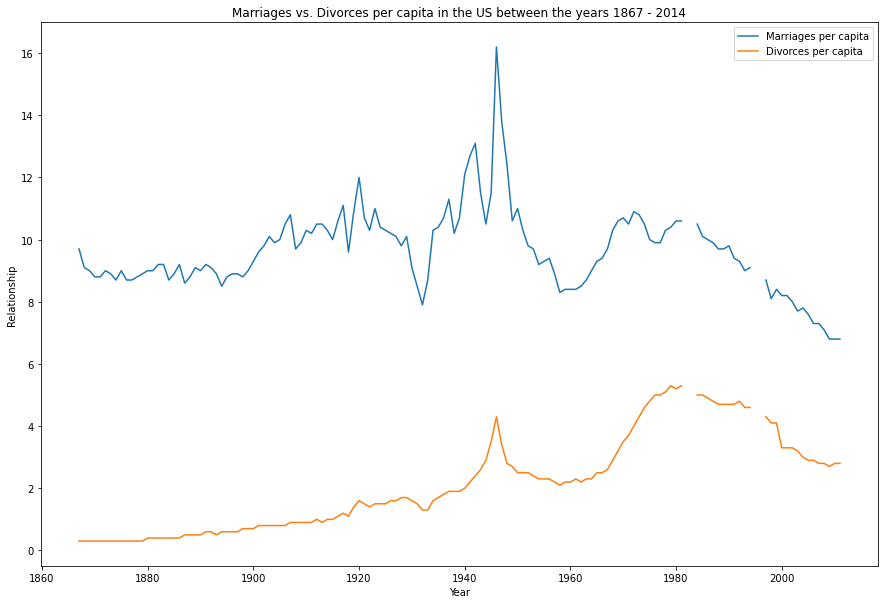

In [97]:
plt.plot(marriage_data['Year'], marriage_data['Marriages_per_1000'], label = "Marriages per capita")
plt.xlabel("Year")  #  x - axis label
plt.ylabel("Relationship")  #  y - axis label
plt.plot(marriage_data['Year'], marriage_data['Divorces_per_1000'], label = "Divorces per capita")
plt.legend(loc = "upper right")
plt.title("Marriages vs. Divorces per capita in the US between the years 1867 - 2014")  # title
plt.rcParams ["figure.figsize"] = (20,10)
plt.show()

Question 7: Create a vertical bar graph of marriage vs divorce rate for years 1900, 1950 and 2000.

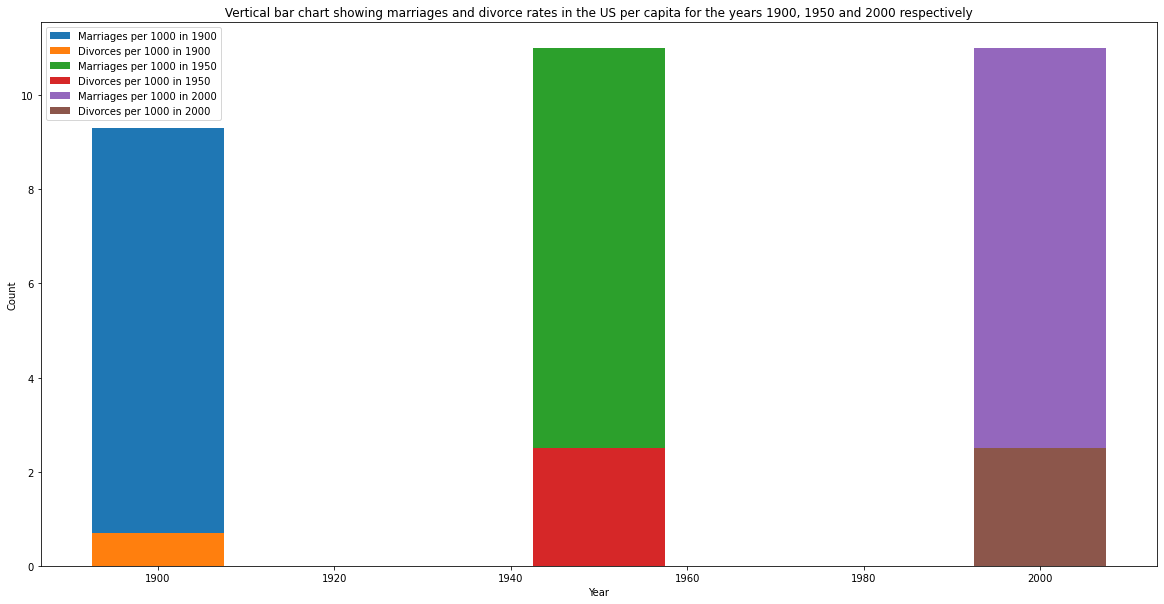

In [58]:
marriage1900 = marriage_data[marriage_data['Year'] == 1900]
marriage1950 = marriage_data[marriage_data['Year'] == 1950]
marriage2000 = marriage_data[marriage_data['Year'] == 2000]
plt.bar(marriage1900['Year'], marriage1900['Marriages_per_1000'], width = 15, label = 'Marriages per 1000 in 1900')
plt.bar(marriage1900['Year'], marriage1900['Divorces_per_1000'], width = 15, label = 'Divorces per 1000 in 1900')
plt.bar(marriage1950['Year'], marriage1950['Marriages_per_1000'], width = 15, label = 'Marriages per 1000 in 1950')
plt.bar(marriage1950['Year'], marriage1950['Divorces_per_1000'], width = 15, label = 'Divorces per 1000 in 1950')
plt.bar(marriage2000['Year'], marriage1950['Marriages_per_1000'], width = 15, label = 'Marriages per 1000 in 2000')
plt.bar(marriage2000['Year'], marriage1950['Divorces_per_1000'], width = 15, label = 'Divorces per 1000 in 2000')
plt.xlabel("Year") # x - axis label 
plt.ylabel("Count") # y - axis label  
plt.legend(loc = "upper left")
plt.title(" Vertical bar chart showing marriages and divorce rates in the US per capita for the years 1900, 1950 and 2000 respectively ")
plt.rcParams ["figure.figsize"] = (15,10)
plt.show()

Question 8: Create horizontal bar graph for deadliest actors in Hollywood 

In [59]:
actors = pd.read_csv('actor_kill_counts.csv')
actors.head(10)

,Actor,Count
0,Arnold Schwarzenegger,369
1,Chow Yun-Fat,295
2,Clint Eastwood,207
3,Clive Owen,194
4,Dolph Lundgren,239
5,Jet Li,201
6,Nicolas Cage,204
7,Sylvester Stallone,267
8,Tomisaburo Wakayama,226
9,Wesley Snipes,193


In [60]:
# Sorting actor names by their kill count

kill_count = actors.sort_values(by = 'Count', ascending = True)
kill_count.head(10)

,Actor,Count
9,Wesley Snipes,193
3,Clive Owen,194
5,Jet Li,201
6,Nicolas Cage,204
2,Clint Eastwood,207
8,Tomisaburo Wakayama,226
4,Dolph Lundgren,239
7,Sylvester Stallone,267
1,Chow Yun-Fat,295
0,Arnold Schwarzenegger,369


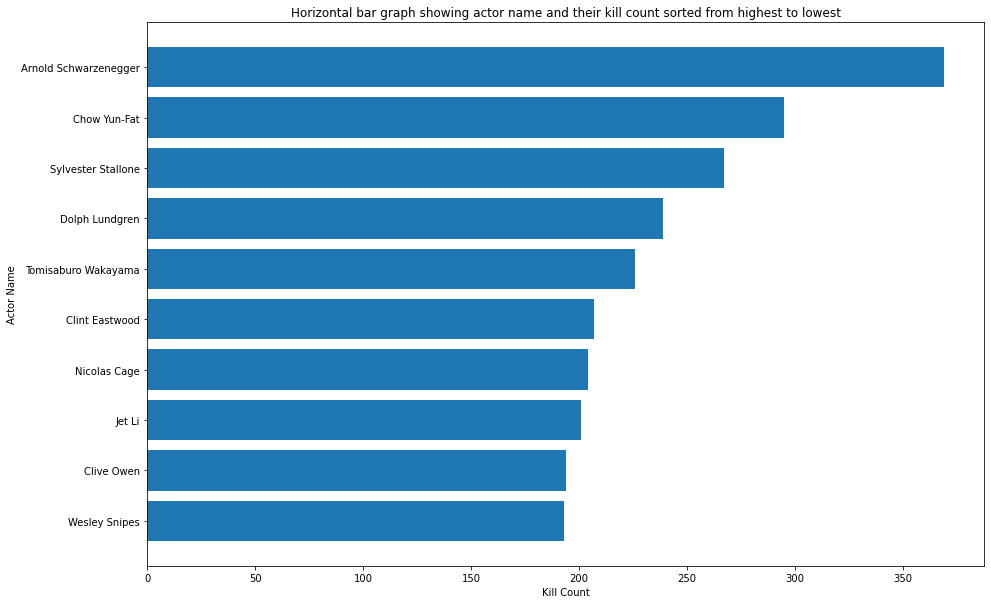

In [61]:
# Plotting a horizontal bar graph

plt.barh(kill_count['Actor'], kill_count['Count'])
plt.ylabel("Actor Name") # y - axis label
plt.xlabel("Kill Count") # x - axis label
plt.title("Horizontal bar graph showing actor name and their kill count sorted from highest to lowest")
plt.rcParams ["figure.figsize"] = (20,10)
plt.show()

Question 9: Create pie chart showing assassinated Roman emperors

In [62]:
# Top 10 rows details of dataset

romans = pd.read_csv('roman-emperor-reigns.csv')
romans.head(10)

,Emperor,Length_of_Reign,Cause_of_Death
0,Augustus,40.58,Possibly assassinated
1,Tiberius,22.50,Possibly assassinated
2,Caligula,4.83,Assassinated
3,Claudius,13.75,Possibly assassinated
4,Nero,13.67,Suicide
5,Galba,0.58,Assassinated
6,Otho,0.25,Suicide
7,Vitellius,0.67,Assassinated
8,Vespasian,10.00,Natural causes
9,Titus,3.25,Illness


In [63]:
# Percentage of deaths grouped by cause of death

percent_assasin = romans.groupby(['Cause_of_Death'])['Cause_of_Death'].count().transform( lambda x: x/x.sum()*100)
percent_death = pd.DataFrame(percent_assasin)
percent_death.rename(columns={'Cause_of_Death' : "Percent_Cause_of_death" }, inplace = True)
display(percent_death.head(10))
percent_death['Cause_of_Death'] = percent_death.index

,Percent_Cause_of_death
Cause_of_Death,
Assassinated,32.352941
Died in captivity,1.470588
Executed,4.411765
Illness,7.352941
Killed in battle,11.764706
Natural causes,23.529412
Possibly assassinated,11.764706
Suicide,7.352941


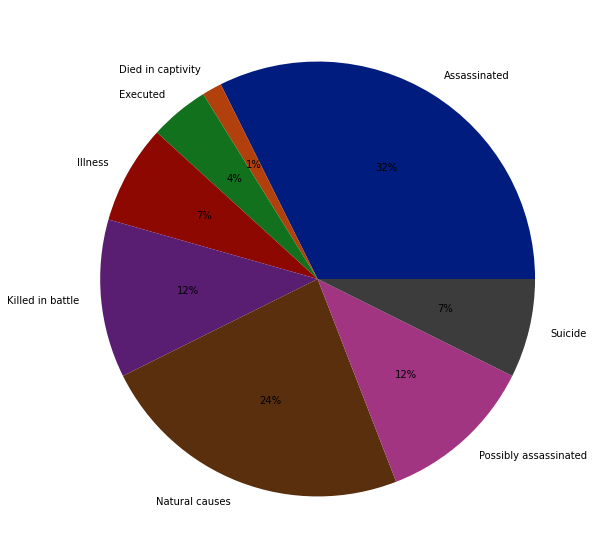

In [64]:
# Pie graph showing fractions of deaths based on cause of death

data = percent_death['Percent_Cause_of_death']
keys = percent_death['Cause_of_Death']
palette_color = sns.color_palette('dark')
plt.pie(data, labels = keys, colors = palette_color, autopct='%.0f%%') # plotting data on chart
plt.show()
plt.rcParams ["figure.figsize"] = (15,10)

Question 10: Create scatter plot 

In [65]:
# Reading and displaying the top 10 rows in dataset

revenue = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
revenue.head(10)

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

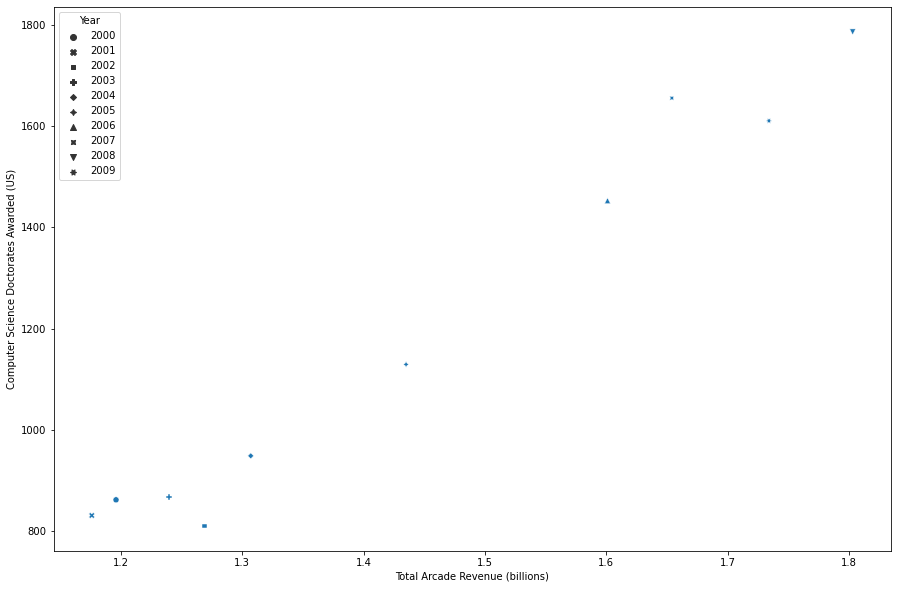

In [66]:
sns.scatterplot(x = revenue['Total Arcade Revenue (billions)'], y = revenue['Computer Science Doctorates Awarded (US)'], data = revenue, style = 'Year')